# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(font_scale=1.5, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

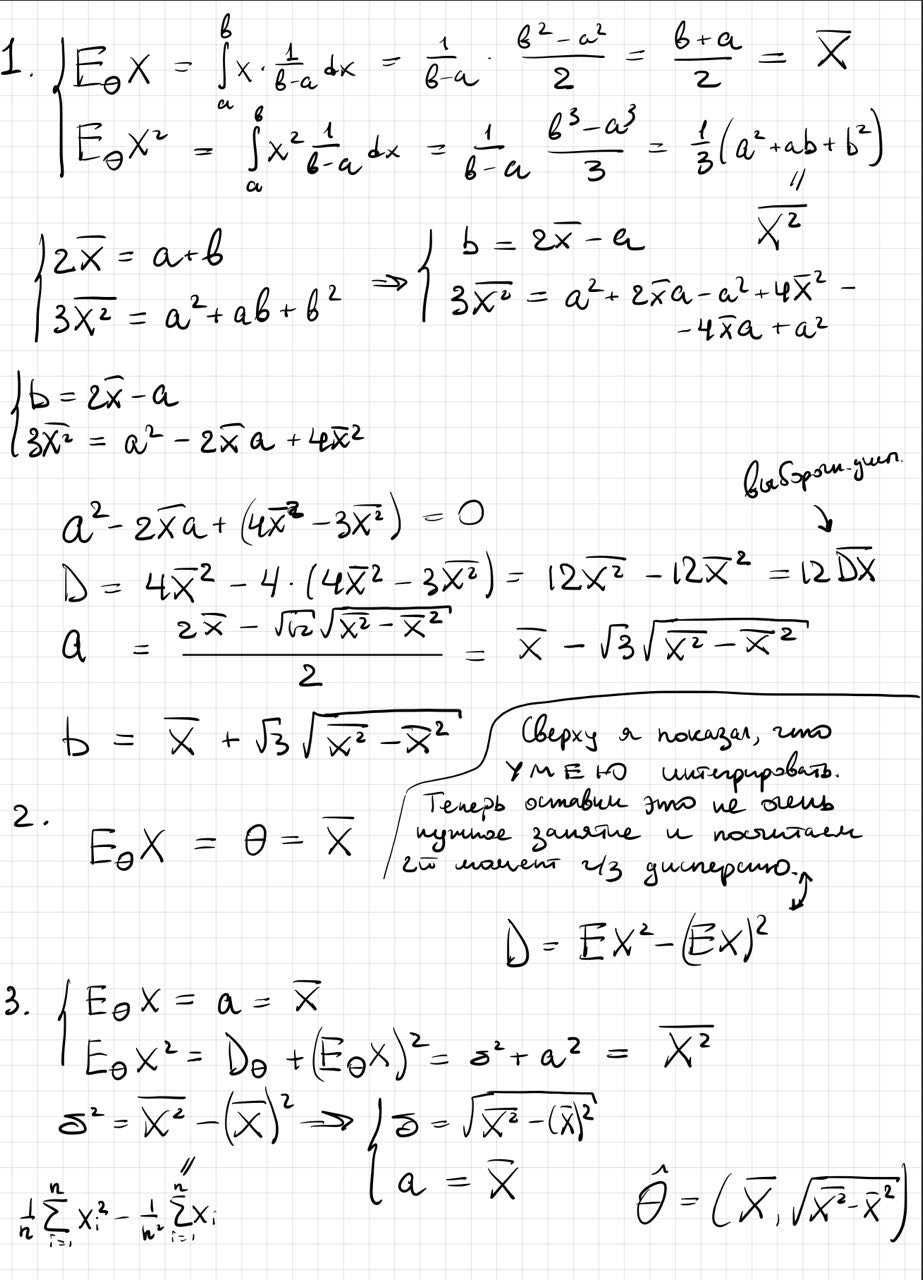


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство.

In [3]:
sample_size = 1000  # размер выборки
samples_count = 50000  # количество выборок

loc, scale = 0, 1
a, b = loc, loc + scale

samples = sps.uniform(loc=loc, scale=scale).rvs(size=(samples_count, sample_size))

In [22]:
m1 = samples.cumsum(axis=1) / np.arange(1, sample_size + 1)
m2 = (samples**2).cumsum(axis=1) / np.arange(1, sample_size + 1)

In [23]:
theta_1 = m1 - np.sqrt(3 * (m2 - (m1 ** 2)))
theta_2 = m1 + np.sqrt(3 * (m2 - (m1 ** 2)))

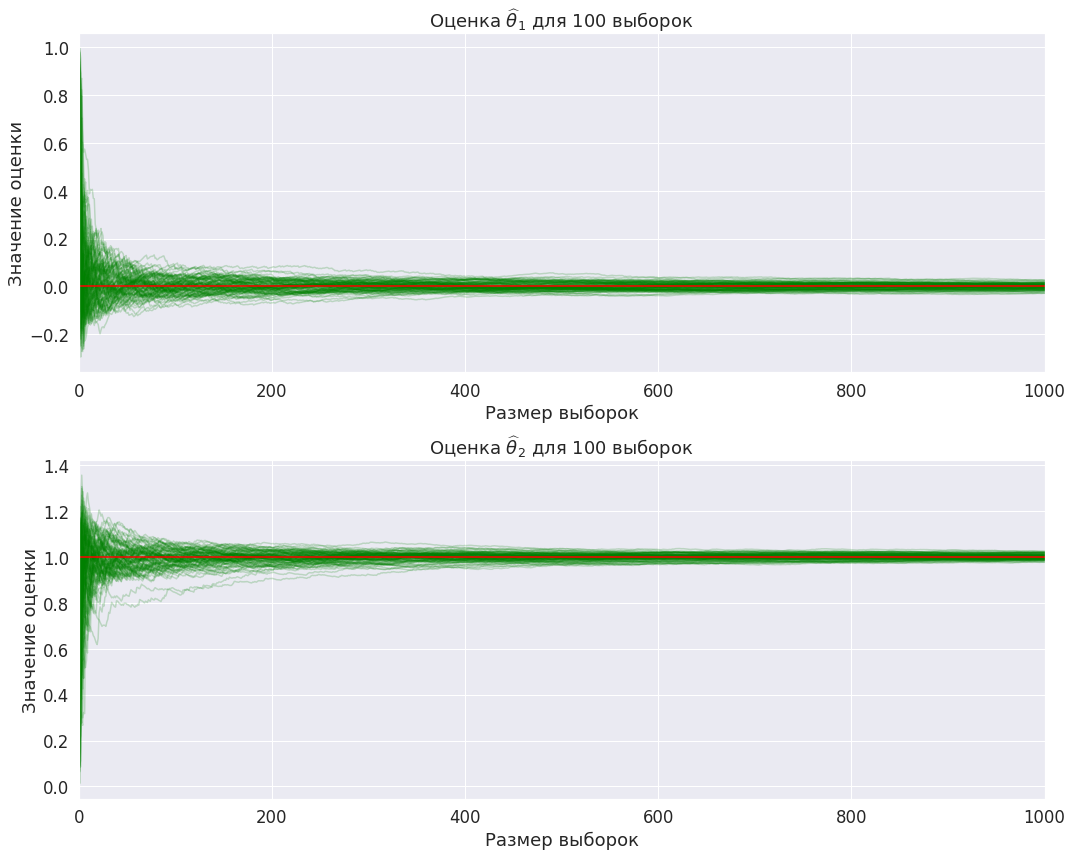

In [29]:
plt.figure(figsize=(15, 12))

real_thetas = [a, b]

for j, theta in enumerate([theta_1, theta_2]):
    plt.subplot(2, 1, j+1)
    
    # рисуем для каждой выборки отдельно
    for i in range(100):
        plt.plot(np.arange(sample_size) + 1, theta[i], color='green', alpha=0.2)

    plt.plot(np.arange(sample_size) + 1, [real_thetas[j]] * sample_size, color='red')

    plt.xlabel('Размер выборок')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $\\widehat{\\theta}_' + str(j+1) + '$ для 100 выборок')
    plt.xlim((0, sample_size))
    # plt.ylim((-2, 2))
    

plt.tight_layout()  # чтобы графики не перекрывались

ЧТД.

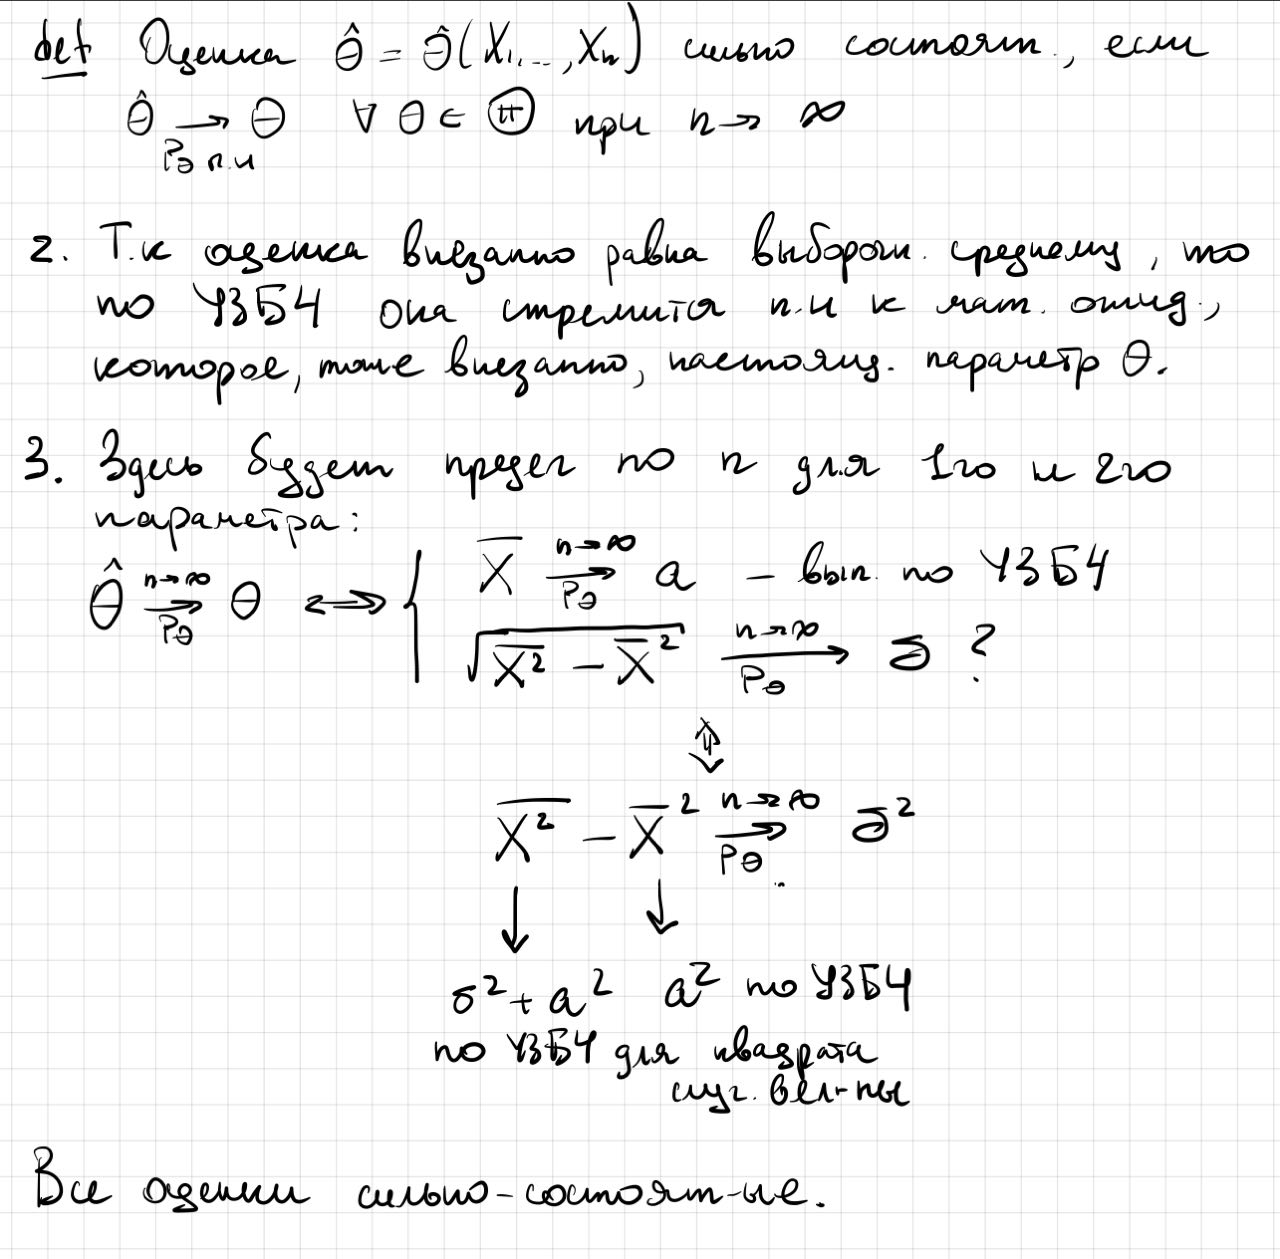

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

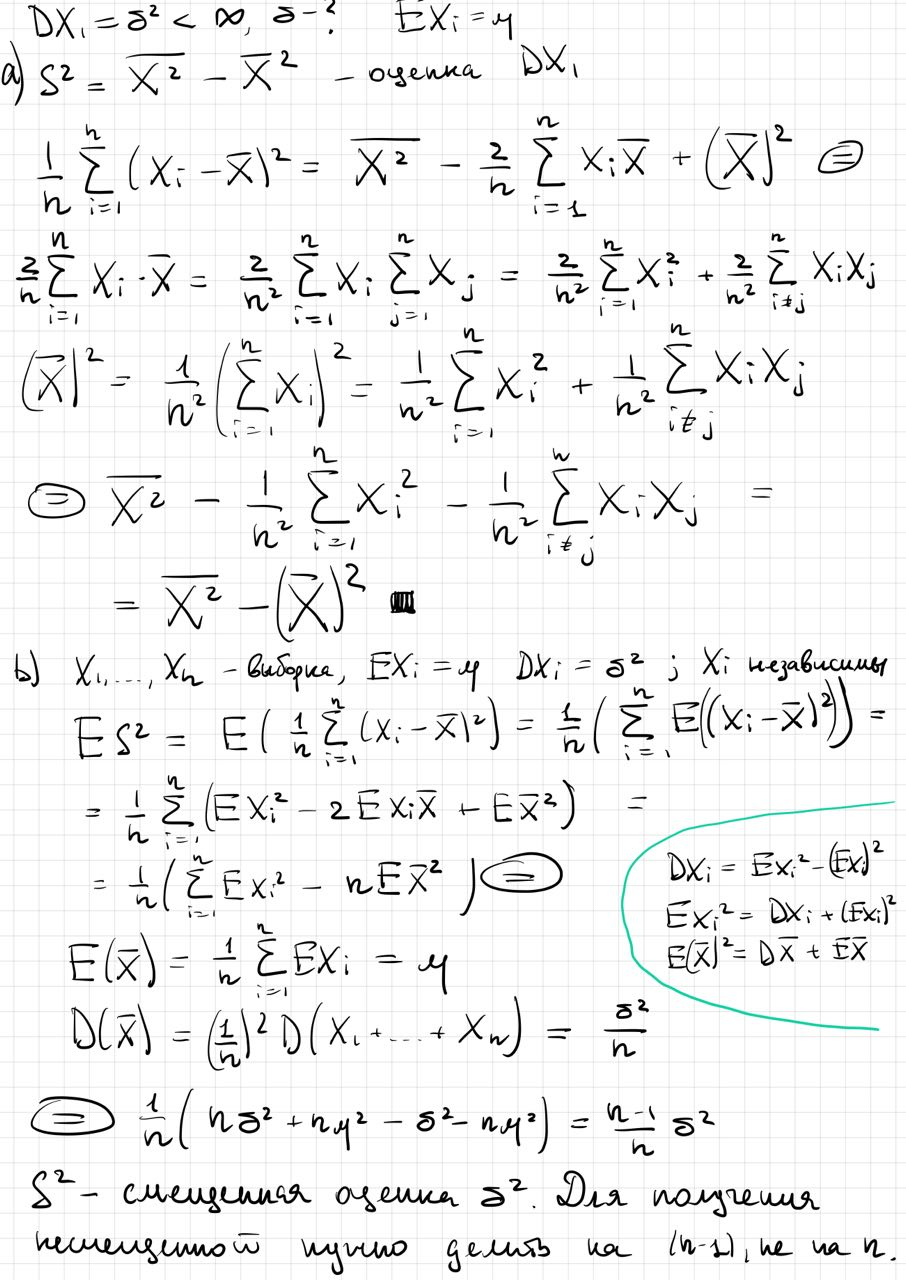

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** ответил в предыдущем пункте - первая несмещенная, вторая - смещенная.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1, 2) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите также презентацию с разбора задания 1. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`.

**Решение:**

In [52]:
k = 500
n = 10

sample_size = n  # размер выборки
samples_count = k  # количество выборок

loc, scale = 0, 1
a, b = loc, loc + scale

samples = sps.norm(loc=loc, scale=1).rvs(size=(samples_count, sample_size))

m1 = samples.mean(axis=1)
m2 = (samples ** 2).mean(axis=1)

estimator = m2 - m1 * m1
estimator2 = n * estimator / (1 + n)

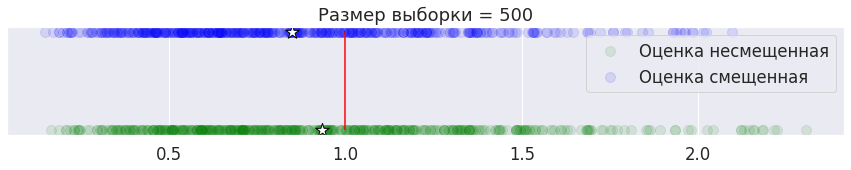

In [53]:
# Вначале:
plt.figure(figsize=(15, 2))

ys = [1, 2]

# Для каждой оценки:
plt.scatter(estimator , np.zeros(k) + ys[0], 
            alpha=0.1, s=100, color='g', label='Оценка несмещенная')
plt.scatter(estimator.mean(), ys[0], marker='*', s=200, 
            color='w', edgecolors='black')

plt.scatter(estimator2 , np.zeros(k) + ys[1], 
            alpha=0.1, s=100, color='b', label='Оценка смещенная')
plt.scatter(estimator2.mean(), ys[1], marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, ys[0], ys[1], color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])

plt.legend()

In [54]:
k = 500
n = 100

sample_size = n  # размер выборки
samples_count = k  # количество выборок

loc, scale = 0, 1
a, b = loc, loc + scale

samples = sps.norm(loc=loc, scale=1).rvs(size=(samples_count, sample_size))

m1 = samples.mean(axis=1)
m2 = (samples ** 2).mean(axis=1)

estimator = m2 - m1 * m1
estimator2 = n * estimator / (1 + n)

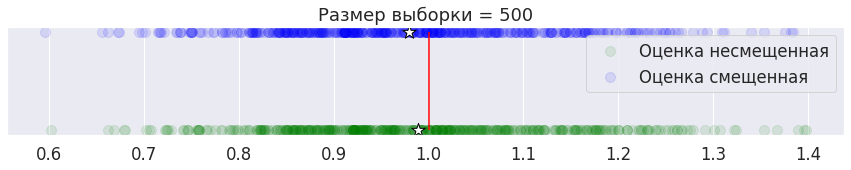

In [55]:
# Вначале:
plt.figure(figsize=(15, 2))

ys = [1, 2]

# Для каждой оценки:
plt.scatter(estimator , np.zeros(k) + ys[0], 
            alpha=0.1, s=100, color='g', label='Оценка несмещенная')
plt.scatter(estimator.mean(), ys[0], marker='*', s=200, 
            color='w', edgecolors='black')

plt.scatter(estimator2 , np.zeros(k) + ys[1], 
            alpha=0.1, s=100, color='b', label='Оценка смещенная')
plt.scatter(estimator2.mean(), ys[1], marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, ys[0], ys[1], color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])

plt.legend()

In [56]:
k = 500
n = 500

sample_size = n  # размер выборки
samples_count = k  # количество выборок

loc, scale = 0, 1
a, b = loc, loc + scale

samples = sps.norm(loc=loc, scale=1).rvs(size=(samples_count, sample_size))

m1 = samples.mean(axis=1)
m2 = (samples ** 2).mean(axis=1)

estimator = m2 - m1 * m1
estimator2 = n * estimator / (1 + n)

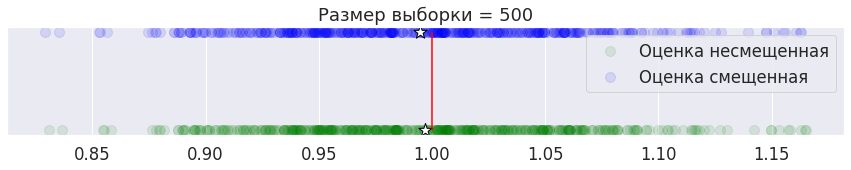

In [57]:
# Вначале:
plt.figure(figsize=(15, 2))

ys = [1, 2]

# Для каждой оценки:
plt.scatter(estimator , np.zeros(k) + ys[0], 
            alpha=0.1, s=100, color='g', label='Оценка несмещенная')
plt.scatter(estimator.mean(), ys[0], marker='*', s=200, 
            color='w', edgecolors='black')

plt.scatter(estimator2 , np.zeros(k) + ys[1], 
            alpha=0.1, s=100, color='b', label='Оценка смещенная')
plt.scatter(estimator2.mean(), ys[1], marker='*', s=200, 
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, ys[0], ys[1], color='r')
plt.title(f'Размер выборки = {k}')
plt.yticks([])

plt.legend()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [ ]:
...

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

- С ростом размера выборки оценки выравниваются, т.е. расстояние между средним уменьшается.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.